In [1]:
import regression
import numpy as np

In [2]:
xArr,yArr=regression.loadDataSet('ex0.txt')

In [3]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [4]:
ws = regression.standRegres(xArr,yArr)

In [5]:
xMat=np.mat(xArr)
yMat=np.mat(yArr)
yHat = xMat*ws

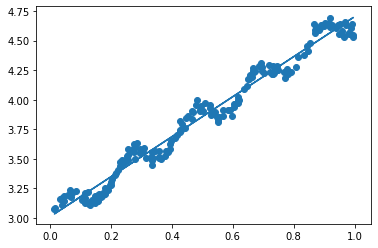

In [6]:
import matplotlib.pyplot as plt
plt.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])
#plt.scatter(xMat[:,1],yHat)  # 为什么同样的写法，plot可以，scatter不行？
plt.plot(xMat[:,1],yHat)  
plt.show()

In [7]:
np.corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [8]:
xArr,yArr=regression.loadDataSet('ex0.txt')

In [9]:
yArr[0]

3.176513

In [10]:
regression.lwlr(xArr[0],xArr,yArr,1.0)

3.1220447140568695

In [11]:
regression.lwlr(xArr[0],xArr,yArr,0.001)

3.201757285524224

In [12]:
yHat = regression.lwlrTest(xArr, xArr, yArr,0.01)

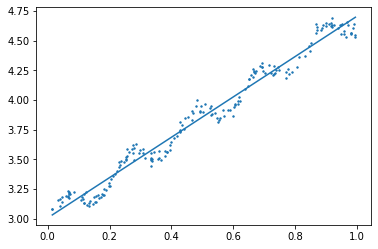

In [13]:
regression.plotLwlrTest(1.0)

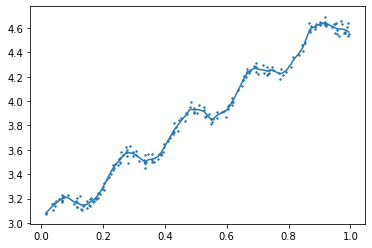

In [14]:
regression.plotLwlrTest(0.01)

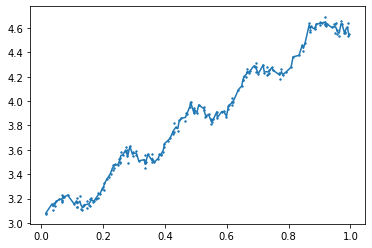

In [15]:
regression.plotLwlrTest(0.003)

In [16]:
abX,abY=regression.loadDataSet('abalone.txt')
yHat01=regression.lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)
yHat1=regression.lwlrTest(abX[0:99],abX[0:99],abY[0:99],1)
yHat10=regression.lwlrTest(abX[0:99],abX[0:99],abY[0:99],10)

In [17]:
regression.rssError(abY[0:99],yHat01.T)

56.81549669032892

In [18]:
regression.rssError(abY[0:99],yHat1.T)

429.8905618702056

In [19]:
regression.rssError(abY[0:99],yHat10.T)

549.1181708826584

In [20]:
yHat01=regression.lwlrTest(abX[100:199],abX[0:99],abY[0:99],0.1)
regression.rssError(abY[100:199],yHat01.T)

40659.27596541478

In [21]:
yHat1=regression.lwlrTest(abX[100:199],abX[0:99],abY[0:99],1)
regression.rssError(abY[100:199],yHat1.T)

573.5261441898057

In [22]:
yHat10=regression.lwlrTest(abX[100:199],abX[0:99],abY[0:99],10)
regression.rssError(abY[100:199],yHat10.T)

517.5711905382693

In [23]:
ws = regression.standRegres(abX[0:99],abY[0:99])
yHat=np.mat(abX[100:199])*ws
regression.rssError(abY[100:199],yHat.T.A)

518.6363153248217

In [24]:
def ridgeRegres(xMat,yMat,lam=0.2):
    X, y = np.array(xArr), np.array(yArr)
    xTx = X.T.dot(X) + lam * np.eye(X.shape[1])
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = np.mat(xTx).I.dot(X.T).dot(y)
    return ws.T

In [53]:
# 标准化
def autoNorm(dataSet):
    max = np.max(dataSet, axis=0)
    min = np.min(dataSet, axis=0)
    return ((dataSet -min) / (max-min))

def ridgeTest(xArr,yArr):
    X = autoNorm(np.array(xArr))
    y = autoNorm(np.array(yArr))
    ws = np.zeros((0, X.shape[1]))
    for i in range(-10, 20):
        w = 
        ws = np.vstack([ws, (ridgeRegres(xMat,yMat,np.exp(i)))])
    return ws

In [54]:
abX,abY=regression.loadDataSet('abalone.txt')
ridgeWeights=ridgeTest(abX,abY)
import matplotlib.pyplot as plt
#print (ridgeWeights)
print (np.array(ridgeWeights))
plt.plot(np.array(ridgeWeights))
#plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly